# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

In [18]:
import math

In [19]:
# Download the dataset
if False:
    !wget https://d17h27t6h515a5.cloudfront.net/topher/2016/November/581faac4_traffic-signs-data/traffic-signs-data.zip
    !unzip traffic-signs-data.zip -d traffic-signs-data

In [20]:
## Import libraries

In [21]:
import pickle
from matplotlib import image
import scipy
from scipy import ndimage
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.image as mpimg
import tensorflow as tf
import random
%matplotlib inline
import os
from sklearn.utils import shuffle
from tensorflow.contrib.layers import flatten
import pandas as pd

In [ ]:
!pip freeze | grep tensorflow

## Step 0: Load The Data

In [22]:
# Load pickled data

# TODO: Fill this in based on where you saved the training and testing data

training_file = './traffic-signs-data/train.p'
testing_file = './traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
    
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train_full, y_train_full = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [31]:
import time

def generate_rotate_image_array(X_images, degree):
    X_images_rotated = []
    for i, image in enumerate(X_images):
        image_rotated = scipy.ndimage.rotate(image,degree, reshape=False)
        X_images_rotated.append(image_rotated)
        
        if i % 5000 == 0:
            print("Degree:", degree, "i", i, "/", len(X_images))
        
    
    pickle.dump( X_images_rotated, open( "./traffic-signs-data/train_full_" + str(degree) + ".p", "wb" ) )

    #plt.imshow(X_images_rotated[0])
    #plt.show()
    
    PER_COL = 3
    num_images = 12
    rows = math.ceil(num_images / float(PER_COL))
    cols = PER_COL
    
    fig, ax_array = plt.subplots(rows, cols)
    plt.suptitle('Rotated degree ' + str(degree))
    for idx, ax in enumerate(ax_array.ravel()):
        ax.imshow(X_images[idx])
        ax.set_title('{:02d}'.format(idx))
            
    # hide both x and y ticks
    plt.setp([a.get_xticklabels() for a in ax_array.ravel()], visible=False)
    plt.setp([a.get_yticklabels() for a in ax_array.ravel()], visible=False)
    plt.draw()
    plt.show()
    
    time.sleep(3)
    
    return X_images_rotated

Degree: 0 i 0 / 39209
Degree: 0 i 5000 / 39209
Degree: 0 i 10000 / 39209
Degree: 0 i 15000 / 39209
Degree: 0 i 20000 / 39209
Degree: 0 i 25000 / 39209
Degree: 0 i 30000 / 39209
Degree: 0 i 35000 / 39209


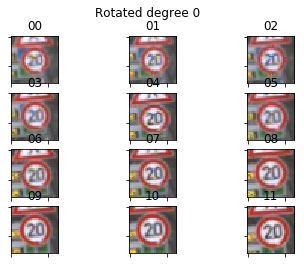

Degree: 60 i 0 / 39209
Degree: 60 i 5000 / 39209
Degree: 60 i 10000 / 39209
Degree: 60 i 15000 / 39209
Degree: 60 i 20000 / 39209
Degree: 60 i 25000 / 39209
Degree: 60 i 30000 / 39209
Degree: 60 i 35000 / 39209


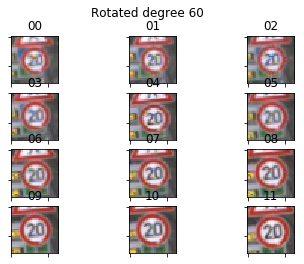

Degree: 120 i 0 / 39209
Degree: 120 i 5000 / 39209
Degree: 120 i 10000 / 39209
Degree: 120 i 15000 / 39209
Degree: 120 i 20000 / 39209
Degree: 120 i 25000 / 39209
Degree: 120 i 30000 / 39209
Degree: 120 i 35000 / 39209


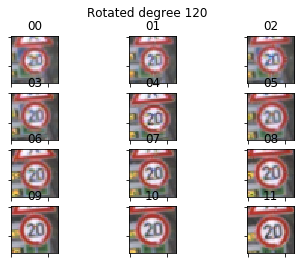

Degree: 180 i 0 / 39209
Degree: 180 i 5000 / 39209
Degree: 180 i 10000 / 39209
Degree: 180 i 15000 / 39209
Degree: 180 i 20000 / 39209
Degree: 180 i 25000 / 39209
Degree: 180 i 30000 / 39209
Degree: 180 i 35000 / 39209


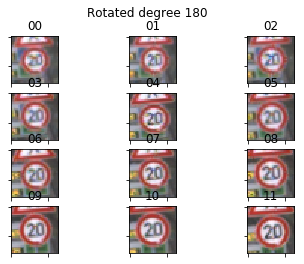

Degree: 240 i 0 / 39209
Degree: 240 i 5000 / 39209
Degree: 240 i 10000 / 39209
Degree: 240 i 15000 / 39209
Degree: 240 i 20000 / 39209
Degree: 240 i 25000 / 39209
Degree: 240 i 30000 / 39209
Degree: 240 i 35000 / 39209


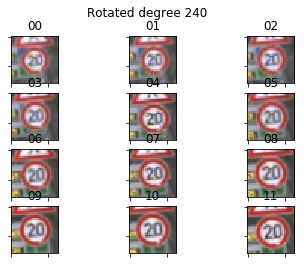

Degree: 300 i 0 / 39209
Degree: 300 i 5000 / 39209
Degree: 300 i 10000 / 39209
Degree: 300 i 15000 / 39209
Degree: 300 i 20000 / 39209
Degree: 300 i 25000 / 39209
Degree: 300 i 30000 / 39209
Degree: 300 i 35000 / 39209


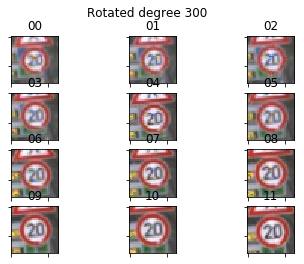

In [32]:
rotate_degrees = [0, 60,120,180,240,300]

''' Run only once'''

for degree in rotate_degrees:
    generate_rotate_image_array(X_train_full,degree)


In [7]:
#pickle.dump( y_train_full, open( "./traffic-signs-data/train_y.p", "wb" ) )

In [33]:
X_train = list()
y_train = None

X_validation = list()
y_validation = None

#pick rotated and unrotated image result as validation
for degree in rotate_degrees:
    training_file = './traffic-signs-data/train_full_' + str(degree) + '.p'
    with open(training_file, mode='rb') as f:
        X_train_full_rotate = pickle.load(f)
    X_train_rotate, X_validation_rotate, y_train_rotate, y_validation_rotate = train_test_split(X_train_full_rotate, y_train_full, test_size=0.10, random_state=42)
    print(type(X_validation_rotate))
    print(type(y_validation_rotate))
    
    #pickle.dump( X_train_rotate, open( "./traffic-signs-data/train_train_x_" + str(degree) + ".p", "wb" ) )
    #pickle.dump( y_train_rotate, open( "./traffic-signs-data/train_train_y_" + str(degree) + ".p", "wb" ) )
    
    X_train.extend(X_train_rotate)
    if y_train == None:
        y_train = y_train_rotate
    else:
        y_train = np.append(y_train, y_train_rotate)
    
    X_validation.extend(X_validation_rotate)
    if y_validation == None:
        y_validation = y_validation_rotate
    else:
        y_validation = np.append(y_validation, y_validation_rotate)
    
    print("len(X_train))", len(X_train_rotate))
    print("len(X_validation))", len(X_validation_rotate))
    print("len(y_train))", len(y_train_rotate))
    print("len(y_validation))", len(y_validation_rotate))
    
print("len total validation: ", len(X_train), len(y_train), len(X_validation), len(y_validation))
pickle.dump( X_validation, open( "./traffic-signs-data/train_validation_x.p", "wb" ) )
pickle.dump( y_validation, open( "./traffic-signs-data/train_validation_y.p", "wb" ) )
pickle.dump( X_train, open( "./traffic-signs-data/train_train_x.p", "wb" ) )
pickle.dump( y_train, open( "./traffic-signs-data/train_train_y.p", "wb" ) )

<class 'list'>
<class 'numpy.ndarray'>
len(X_train)) 35288
len(X_validation)) 3921
len(y_train)) 35288
len(y_validation)) 3921
<class 'list'>
<class 'numpy.ndarray'>
len(X_train)) 35288
len(X_validation)) 3921
len(y_train)) 35288
len(y_validation)) 3921


/root/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel_launcher.py:20: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
/root/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel_launcher.py:26: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


<class 'list'>
<class 'numpy.ndarray'>
len(X_train)) 35288
len(X_validation)) 3921
len(y_train)) 35288
len(y_validation)) 3921
<class 'list'>
<class 'numpy.ndarray'>
len(X_train)) 35288
len(X_validation)) 3921
len(y_train)) 35288
len(y_validation)) 3921
<class 'list'>
<class 'numpy.ndarray'>
len(X_train)) 35288
len(X_validation)) 3921
len(y_train)) 35288
len(y_validation)) 3921
<class 'list'>
<class 'numpy.ndarray'>
len(X_train)) 35288
len(X_validation)) 3921
len(y_train)) 35288
len(y_validation)) 3921
len total validation:  211728 211728 23526 23526


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [34]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train_full)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = np.array(X_train_full[0]).shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train_full))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

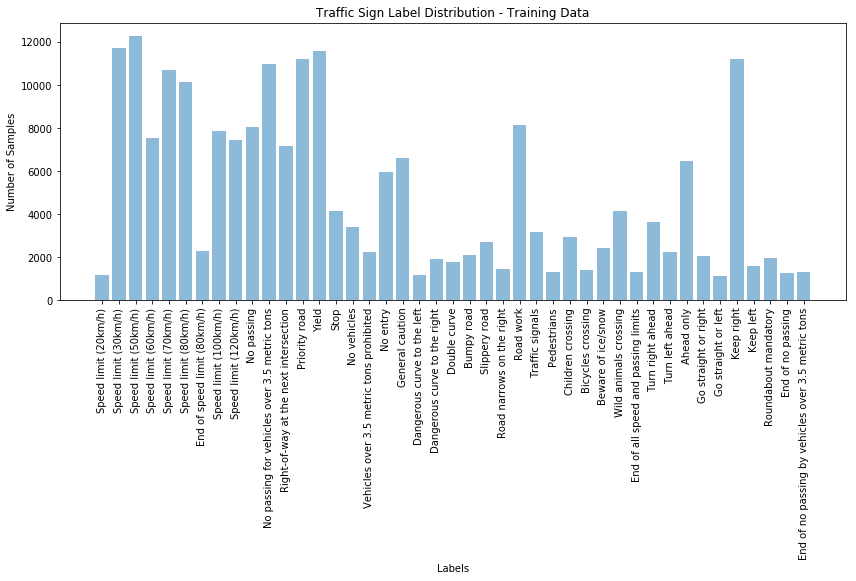

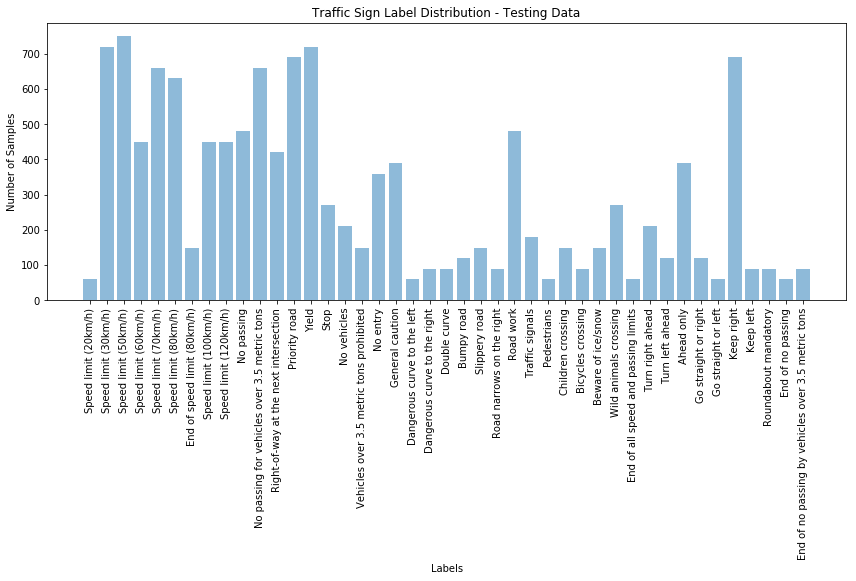

In [35]:
signnames = pd.read_csv('signnames.csv')

def plot_label_distribution(y_tvt, title):
    
    class_arr= []
    samples_arr=[]

    for class_n in range(n_classes):
        class_indices = np.where(y_tvt == class_n)
        n_samples = len(class_indices[0])
        class_arr.append(class_n)
        samples_arr.append(n_samples)

    fig = plt.figure(figsize = (12, 8))
    ax = plt.subplot(111)
    plt.bar( class_arr, samples_arr,align='center', alpha=0.5)
    ax.set_xticks(np.arange(n_classes))
    ax.set_xticklabels(signnames.SignName.values, rotation = 'vertical')
    plt.ylabel('Number of Samples')
    plt.xlabel('Labels')
    plt.tight_layout()
    plt.title("Traffic Sign Label Distribution - " + title + " Data")
    plt.show()

plot_label_distribution(y_train, "Training")
plot_label_distribution(y_test, "Testing")

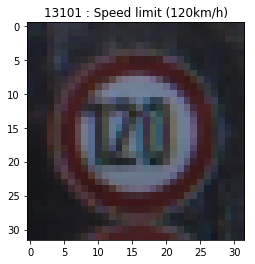

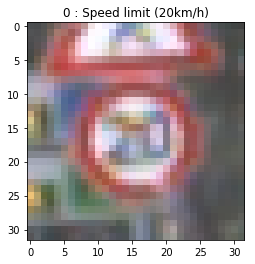

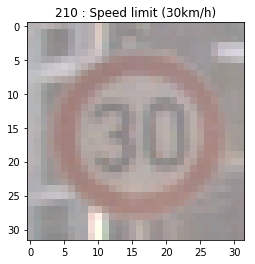

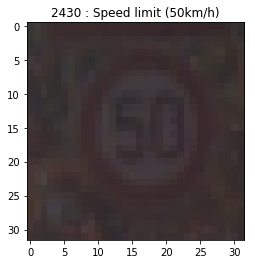

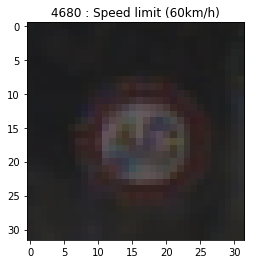

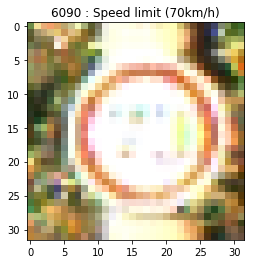

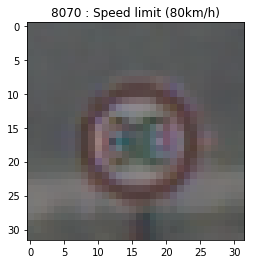

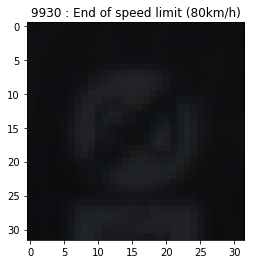

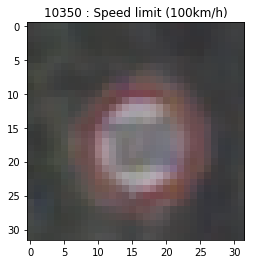

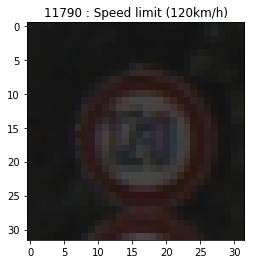

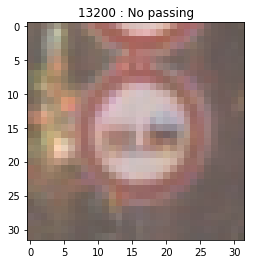

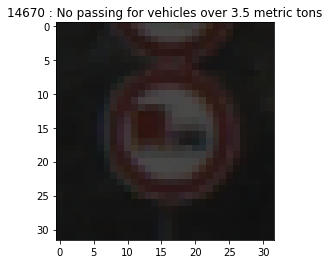

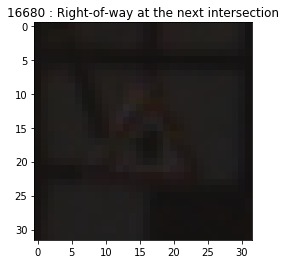

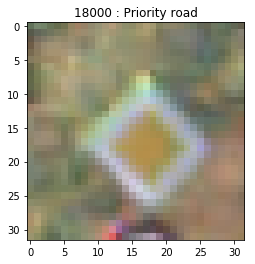

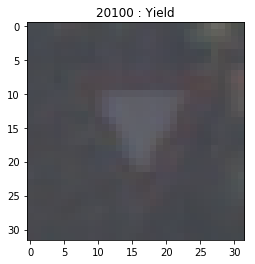

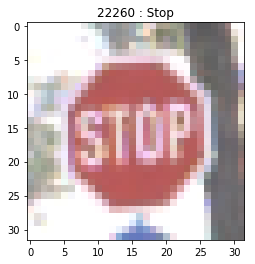

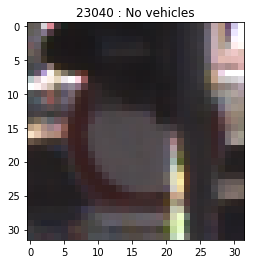

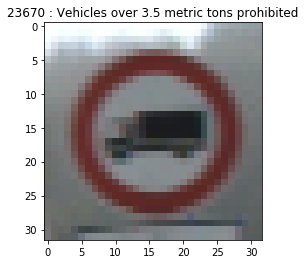

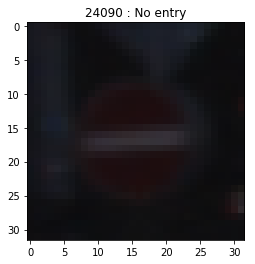

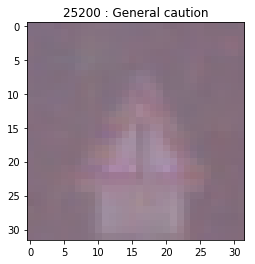

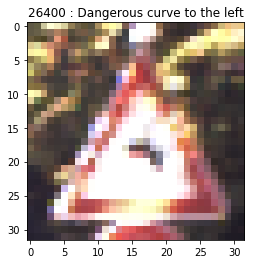

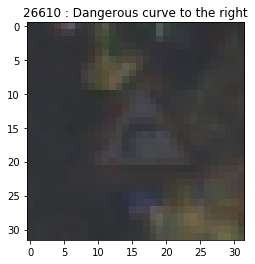

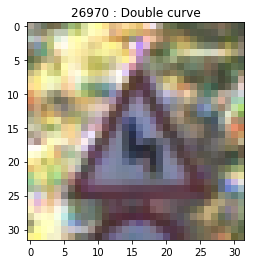

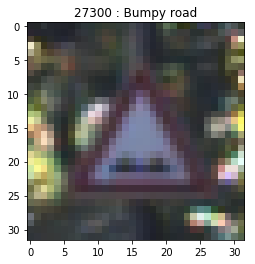

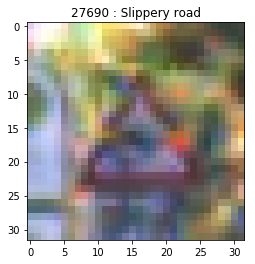

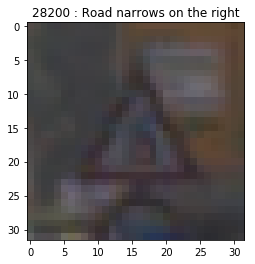

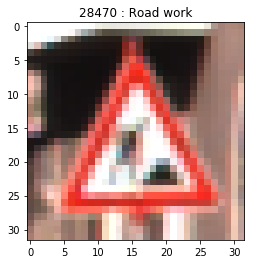

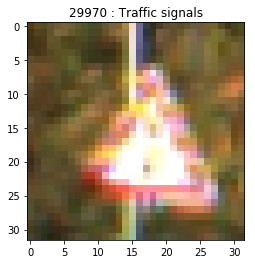

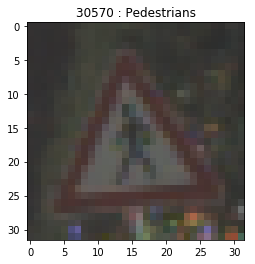

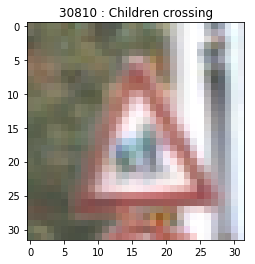

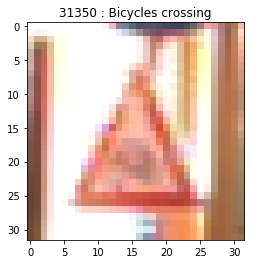

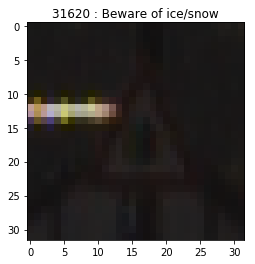

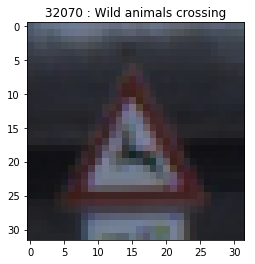

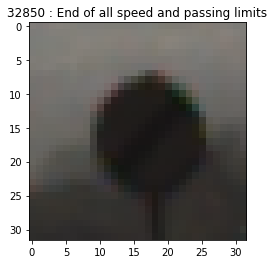

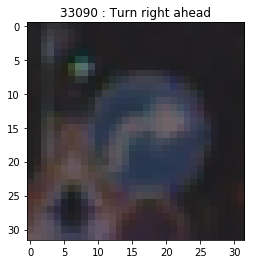

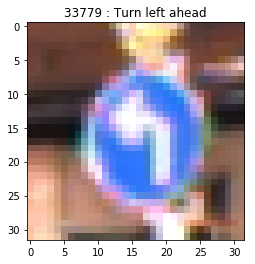

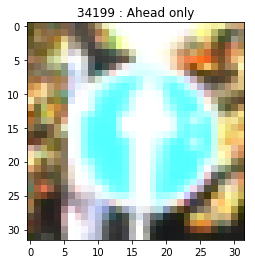

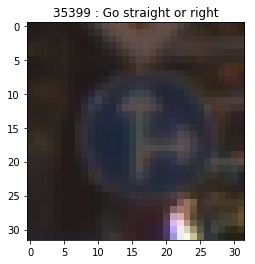

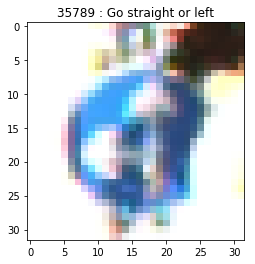

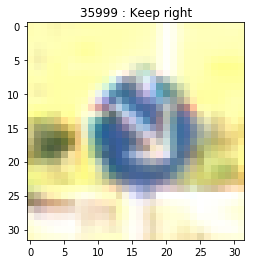

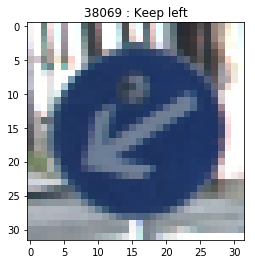

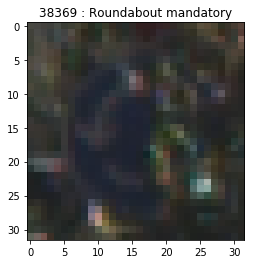

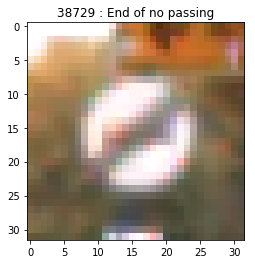

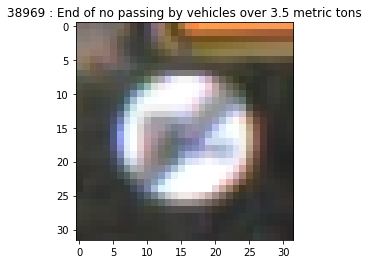

In [36]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
# Visualizations will be shown in the notebook.

def visualize_image(i):    
    label_idx = y_train_full[i]
    sign_name = signnames.iloc[label_idx].SignName
    
    plt.imshow(X_train_full[i])
    plt.title(str(i) + " : " + sign_name)
    plt.show()
    plt.clf()

i=13101
visualize_image(i)

for class_n in range(n_classes):
    class_indices = np.where(y_train_full == class_n)    
    idx = class_indices[0][0]
    visualize_image(idx)
    
# TODO: Show multiple images
# TODO: Visualize the distribution

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [37]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

In [38]:

assert(len(X_train_full) == len(y_train_full))
assert(len(X_test) == len(y_test))

print()
print("Image Shape: {}".format(X_train_full[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train_full)))
print("Test Set:       {} samples".format(len(X_test)))



Image Shape: (32, 32, 3)

Training Set:   39209 samples
Test Set:       12630 samples


1


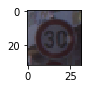

In [39]:
index = random.randint(0, len(X_train_full))
image = X_train_full[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train_full[index])

In [40]:
# TODO: Grayscale

In [41]:
#Generate Rotated new datasets

## Adam vs SGD

https://medium.com/syncedreview/iclr-2019-fast-as-adam-good-as-sgd-new-optimizer-has-both-78e37e8f9a34#:~:text=SGD%20is%20a%20variant%20of,random%20selection%20of%20data%20examples.&text=Essentially%20Adam%20is%20an%20algorithm,optimization%20of%20stochastic%20objective%20functions.

https://ruder.io/optimizing-gradient-descent/
An overview of gradient descent optimization algorithms. Which optimizer to use?


https://datascience.stackexchange.com/questions/30344/why-not-always-use-the-adam-optimization-technique/30347

Here’s a blog post reviewing an article claiming SGD is a better generalized adapter than ADAM. https://shaoanlu.wordpress.com/2017/05/29/sgd-all-which-one-is-the-best-optimizer-dogs-vs-cats-toy-experiment/

There is often a value to using more than one method (an ensemble), because every method has a weakness.

TODO: Plot the graph

https://machinelearningmastery.com/visualize-deep-learning-neural-network-model-keras/
https://ai.googleblog.com/2016/08/tf-slim-high-level-library-to-define.html
https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model
https://www.tensorflow.org/tensorboard/graphs

TODO: Discuss the drop out rate

https://machinelearningmastery.com/how-to-reduce-overfitting-with-dropout-regularization-in-keras/

TODO: Discuss other models besides LeNet

https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

99% accuracy
https://www.kaggle.com/lalithmovva/99-accuracy-on-german-traffic-sign-recognition

TODO: Training accuracy vs Valid accuracy

In [42]:
EPOCHS = 20#50
BATCH_SIZE = 128

def conv2d(x,W,b, strides=1):
    
    #print(x)
    #print(strides)
    #print(W.eval())
    
    x = tf.nn.conv2d(x,W,strides=[1, strides, strides,1], padding='VALID')
    x = tf.nn.bias_add(x,b)
    return tf.nn.relu(x)

def maxpool2d(x,k=2):
    return tf.nn.max_pool( x, ksize = [1,k,k,1], strides = [1,k,k,1], padding='VALID')
    
def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    weight_layer_1 = tf.Variable(tf.truncated_normal( shape=(5, 5, 3, 6), mean=mu, stddev=sigma ) )#tf.Variable(tf.truncated_normal( [5, 5, 1, 6]))
    bias_layer_1 = tf.Variable(tf.zeros(6))

    weight_layer_2 = tf.Variable(tf.truncated_normal(shape=(5,5,6,16), mean=mu,stddev=sigma) )
    bias_layer_2 = tf.Variable(tf.zeros(16))

    weight_connected = tf.Variable(tf.truncated_normal([5*5*16, 400]))
    bias_connected = tf.Variable(tf.zeros(400))

    weight_layer_3 = tf.Variable(tf.truncated_normal(shape=(400, 120),mean=mu,stddev=sigma))
    bias_layer_3 = tf.Variable(tf.zeros(120))

    weight_layer_4 = tf.Variable(tf.truncated_normal(shape=(120,84),mean=mu, stddev=sigma))
    bias_layer_4 = tf.Variable(tf.zeros(84))

    weight_layer_5 = tf.Variable(tf.truncated_normal(shape=(84,43), mean=mu, stddev=sigma))
    bias_layer_5 = tf.Variable(tf.zeros(43))    
    
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1 = conv2d(x,weight_layer_1,bias_layer_1,1 )
    # TODO: Activation.
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = maxpool2d(conv1)

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    # TODO: Activation.
    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = conv2d(conv1,weight_layer_2,bias_layer_2,1 )
    conv2 = maxpool2d(conv2)


    # TODO: Flatten. Input = 5x5x16. Output = 400.
    #fc1 = tf.reshape(conv2, 
    #                 [-1, weight_connected.get_shape().as_list()[0]])
    #fc1 = tf.add(tf.matmul(fc1, weight_connected), bias_connected)
    #fc1 = tf.nn.tanh(fc1)
    fc1 = flatten(conv2)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    conv3 = tf.add(tf.matmul(fc1,weight_layer_3), bias_layer_3)
    # TODO: Activation.
    conv3 = tf.nn.relu(conv3)
    
    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    conv4 = tf.add(tf.matmul(conv3,weight_layer_4), bias_layer_4)
    # TODO: Activation.
    conv4 = tf.nn.relu(conv4)

    # TODO: Layer 5: Fully Connected. Input = 84. Output = 10.
    logits = tf.add(tf.matmul(conv4,weight_layer_5), bias_layer_5)

    
    return logits


x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)


rate = 0.001

logits = LeNet(x)

sm = tf.nn.softmax(logits)
prediction = tf.argmax(sm, 1)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits= logits, labels= one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    train_loss = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        loss = sess.run(loss_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
        train_loss +=  (loss * len(batch_x))
    return total_accuracy / num_examples, train_loss / num_examples


In [43]:
#X_train, y_train = shuffle(X_train, y_train)

In [48]:
with tf.Session() as sess:
    #sess.run(tf.global_variables_initializer())
    sess.run(tf.initialize_all_variables())
    
    train_file_x = "./traffic-signs-data/train_train_x.p"
    train_file_y = "./traffic-signs-data/train_train_y.p"
    validation_file_x = "./traffic-signs-data/train_validation_x.p"
    validation_file_y = "./traffic-signs-data/train_validation_y.p"
    with open(train_file_x, mode='rb') as f:
        X_train = pickle.load(f)  
    with open(train_file_y, mode='rb') as f:
        y_train = pickle.load(f)  
    with open(validation_file_x, mode='rb') as f:
        X_validation = pickle.load(f)  
    with open(validation_file_y, mode='rb') as f:
        y_validation = pickle.load(f)  
    
    num_examples = len(X_train)
    
    print("Training...")
    print()
    
    #accuracy history
    history_valid = []
    history_train = []
    history_valid_loss = []
    history_train_loss = []
    
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            
            if ( end / BATCH_SIZE % 100 ) == 0:
                print("EPOCH {} / {}  {} / {} ...".format(i+1, EPOCHS, end, len(y_train)))
            
            # Print loss
            # https://stackoverflow.com/questions/33833818/printing-the-loss-during-tensorflow-training
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            #_, loss_val = 
            #print("loss===:", loss_val)
            
        train_accuracy, train_loss = evaluate(X_train, y_train)
        validation_accuracy, validation_loss = evaluate(X_validation, y_validation)
        #validation_accuracy = evaluate(X_test, y_test)
        print("EPOCH {} ...".format(i+1))
        print("Train Accuracy = {:.3f} Validation Accuracy = {:.3f} Train Loss = {:.3f} Validation Loss = {:.3f}".format(train_accuracy, validation_accuracy, train_loss, validation_loss))
        
        history_valid.append(validation_accuracy)
        history_train.append(train_accuracy)
        history_valid_loss.append(validation_loss)
        history_train_loss.append(train_loss)        
        
        
    ''''''
    
    '''
    #Continue train with rotated data
    
    validation_file_x = "./traffic-signs-data/train_validation_x.p"
    validation_file_y = "./traffic-signs-data/train_validation_y.p"
    with open(validation_file_x, mode='rb') as f:
        X_validation = pickle.load(f)  
    with open(validation_file_y, mode='rb') as f:
        y_validation = pickle.load(f)  
                
    
    for degree in rotate_degrees:
        training_file_x = './traffic-signs-data/train_train_x_' + str(degree) + '.p'
        training_file_y = './traffic-signs-data/train_train_y_' + str(degree) + '.p'
        #with open(training_file, mode='rb') as f:
        #    X_train_rotate = pickle.load(f)            
        #X_train, X_validation, y_train, y_validation = train_test_split(X_train_rotate, y_train_full, test_size=0.20, random_state=42)
        with open(training_file_x, mode='rb') as f:
            X_train = pickle.load(f)            
        with open(training_file_y, mode='rb') as f:
            y_train = pickle.load(f)            
        
        
        
        num_examples = len(X_train)
        for i in range(EPOCHS):
            X_train, y_train = shuffle(X_train, y_train)

            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
            validation_accuracy = evaluate(X_validation, y_validation)
            #validation_accuracy = evaluate(X_test, y_test)
            print("Rotate degree " + str(degree) + "EPOCH {} ...".format(i+1))
            print("Rotate degree " + str(degree) + "Validation Accuracy = {:.3f}".format(validation_accuracy))
            print()
    '''
    
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    saver.save(sess, 'lenet')
    print("Model saved")

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Training...

EPOCH 1 / 20  12800 / 211728 ...
EPOCH 1 / 20  25600 / 211728 ...
EPOCH 1 / 20  38400 / 211728 ...
EPOCH 1 / 20  51200 / 211728 ...
EPOCH 1 / 20  64000 / 211728 ...
EPOCH 1 / 20  76800 / 211728 ...
EPOCH 1 / 20  89600 / 211728 ...
EPOCH 1 / 20  102400 / 211728 ...
EPOCH 1 / 20  115200 / 211728 ...
EPOCH 1 / 20  128000 / 211728 ...
EPOCH 1 / 20  140800 / 211728 ...
EPOCH 1 / 20  153600 / 211728 ...
EPOCH 1 / 20  166400 / 211728 ...
EPOCH 1 / 20  179200 / 211728 ...
EPOCH 1 / 20  192000 / 211728 ...
EPOCH 1 / 20  204800 / 211728 ...
EPOCH 1 ...
Train Accuracy = 0.617 Validation Accuracy = 0.605 Train Loss = 1.270 Validation Loss = 1.322
EPOCH 2 / 20  12800 / 211728 ...
EPOCH 2 / 20  25600 / 211728 ...
EPOCH 2 / 20  38400 / 211728 ...
EPOCH 2 / 20  51200 / 211728 ...
EPOCH 2 / 20  64000 / 211728 ...
EPOCH 2 / 20  76800 / 211728 ...
EPOCH 2 / 20  89600 / 211728 ...
EPOCH 2 / 20  102400 / 211728 ...
EPOCH

EPOCH 13 / 20  51200 / 211728 ...
EPOCH 13 / 20  64000 / 211728 ...
EPOCH 13 / 20  76800 / 211728 ...
EPOCH 13 / 20  89600 / 211728 ...
EPOCH 13 / 20  102400 / 211728 ...
EPOCH 13 / 20  115200 / 211728 ...
EPOCH 13 / 20  128000 / 211728 ...
EPOCH 13 / 20  140800 / 211728 ...
EPOCH 13 / 20  153600 / 211728 ...
EPOCH 13 / 20  166400 / 211728 ...
EPOCH 13 / 20  179200 / 211728 ...
EPOCH 13 / 20  192000 / 211728 ...
EPOCH 13 / 20  204800 / 211728 ...
EPOCH 13 ...
Train Accuracy = 0.956 Validation Accuracy = 0.937 Train Loss = 0.146 Validation Loss = 0.253
EPOCH 14 / 20  12800 / 211728 ...
EPOCH 14 / 20  25600 / 211728 ...
EPOCH 14 / 20  38400 / 211728 ...
EPOCH 14 / 20  51200 / 211728 ...
EPOCH 14 / 20  64000 / 211728 ...
EPOCH 14 / 20  76800 / 211728 ...
EPOCH 14 / 20  89600 / 211728 ...
EPOCH 14 / 20  102400 / 211728 ...
EPOCH 14 / 20  115200 / 211728 ...
EPOCH 14 / 20  128000 / 211728 ...
EPOCH 14 / 20  140800 / 211728 ...
EPOCH 14 / 20  153600 / 211728 ...
EPOCH 14 / 20  166400 / 21172

In [49]:
type(sess.graph)

tensorflow.python.framework.ops.Graph

In [50]:
#!tensorboard --logdir logs

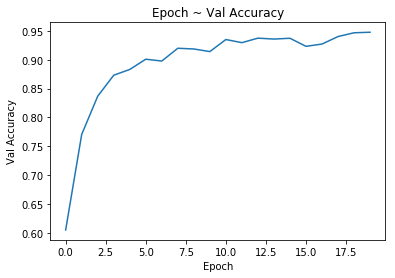

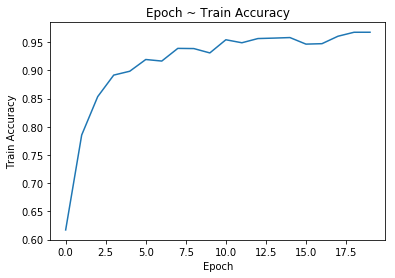

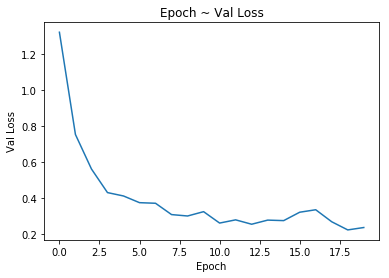

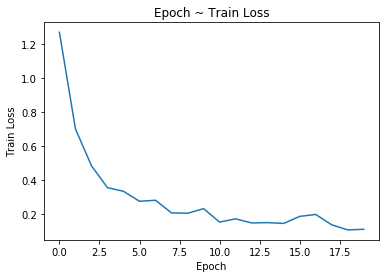

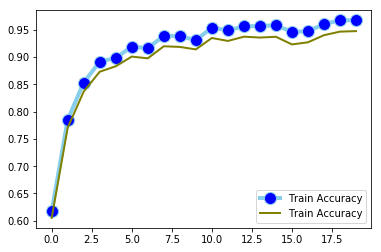

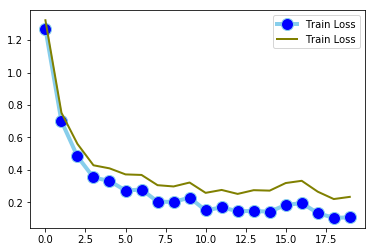

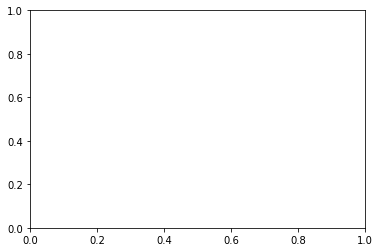

In [51]:
plt.plot(history_valid)
plt.title("Epoch ~ Val Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Val Accuracy")
plt.show()
plt.cla()

plt.plot(history_train)
plt.title("Epoch ~ Train Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Train Accuracy")
plt.show()
plt.cla()

plt.plot(history_valid_loss)
plt.title("Epoch ~ Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Val Loss")
plt.show()
plt.cla()

plt.plot(history_train_loss)
plt.title("Epoch ~ Train Loss")
plt.xlabel("Epoch")
plt.ylabel("Train Loss")
plt.show()
plt.cla()

# multiple line plot
plt.plot( history_train, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4, label="Train Accuracy")
plt.plot( history_valid, marker='', color='olive', linewidth=2, label="Train Accuracy")
plt.legend()
plt.show()
plt.cla()


plt.plot( history_train_loss, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4, label="Train Loss")
plt.plot( history_valid_loss, marker='', color='olive', linewidth=2, label="Train Loss")
plt.legend()
plt.show()
plt.cla()


In [52]:
# TODO: Visualize the training progress. Accuracy vs Loss

In [54]:
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables()) #It will show error without this line
    loader = tf.train.import_meta_graph('lenet.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))

    test_accuracy, test_loss = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f} Test Loss = {:.3f}".format(test_accuracy, test_loss))


Instructions for updating:
Use `tf.global_variables_initializer` instead.
INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.876 Test Loss = 0.964


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

In [ ]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

##Answer: 


The data was ordered by cluster type before preprocessing. It will make the trainning accurate to a very small value at first.
To avoid this problem is to shuffle the data randomly. 

Rotate the images with 6 different angles to do the rotate. Then use all the rotated data as trainning data, then split as train/validation parts. It increased the amount of data for training.

use train_test_split function to do the split. Split 90% as the train data, 10% as validation data.



### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**


Split the train data into train and validation.  Use the test data as test data.
use train_test_split function to do the split. Split 90% as the train data, 10% as validation data.


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

The architecture use CNN(convolutional neuro network). It has 5 layers.

Layer1: Convolutional 
   Input: 32*32*3
   Output: 14*14*6
   
Layer2: Convolutional
    Input: 14*14*6
    Output: 5*5*16
   
Flatten to 400

Layer3: Fully Connected
    Input: 400
    Output: 120
    
Layer4: Fully Connected
    Input: 120
    Output: 84
    
Layer5: Fully Connected
    Input: 84
    Output: 10


### Train your model here.
### Feel free to use as many code cells as needed.

    mu = 0
    sigma = 0.1
    
    weight_layer_1 = tf.Variable(tf.truncated_normal( shape=(5, 5, 3, 6), mean=mu, stddev=sigma ) )#tf.Variable(tf.truncated_normal( [5, 5, 1, 6]))
    bias_layer_1 = tf.Variable(tf.zeros(6))

    weight_layer_2 = tf.Variable(tf.truncated_normal(shape=(5,5,6,16), mean=mu,stddev=sigma) )
    bias_layer_2 = tf.Variable(tf.zeros(16))

    weight_connected = tf.Variable(tf.truncated_normal([5*5*16, 400]))
    bias_connected = tf.Variable(tf.zeros(400))

    weight_layer_3 = tf.Variable(tf.truncated_normal(shape=(400, 120),mean=mu,stddev=sigma))
    bias_layer_3 = tf.Variable(tf.zeros(120))

    weight_layer_4 = tf.Variable(tf.truncated_normal(shape=(120,84),mean=mu, stddev=sigma))
    bias_layer_4 = tf.Variable(tf.zeros(84))

    weight_layer_5 = tf.Variable(tf.truncated_normal(shape=(84,43), mean=mu, stddev=sigma))
    bias_layer_5 = tf.Variable(tf.zeros(43))    
    
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1 = conv2d(x,weight_layer_1,bias_layer_1,1 )
    # Activation.
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = maxpool2d(conv1)

    # Layer 2: Convolutional. Output = 10x10x16.
    # Activation.
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = conv2d(conv1,weight_layer_2,bias_layer_2,1 )
    conv2 = maxpool2d(conv2)


    # Flatten. Input = 5x5x16. Output = 400.
    fc1 = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    conv3 = tf.add(tf.matmul(fc1,weight_layer_3), bias_layer_3)
    # Activation.
    conv3 = tf.nn.relu(conv3)
    
    # Layer 4: Fully Connected. Input = 120. Output = 84.
    conv4 = tf.add(tf.matmul(conv3,weight_layer_4), bias_layer_4)
    # Activation.
    conv4 = tf.nn.relu(conv4)

    #Layer 5: Fully Connected. Input = 84. Output = 10.
    logits = tf.add(tf.matmul(conv4,weight_layer_5), bias_layer_5)



### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_



**Answer:**


The model trainning use 50 EPOCHS, each epoch run min batch, with BATCH_SIZE = 128

The rate set to 0.001

The optimizer use AdamOptimizer. 
The reason why use AdamOptimizer is that, the tf.train.AdamOptimizer use Kingma and Ba's Adam algorithm to control the learning rate. It has several advantages over simple GradientDescentOptimizer. It use moving average of parameters, it enables Adam to use larger effective step size, and the algorithm will converge to this step size without fine tunning. 

The steps to set the optimizer as follows:

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

I use leNet to solve this problem because the traffic sign dataset and results are similiar with the letNet issue. 

The network size increase didn't provide too much improvement of the accuracy. This solution use a middle size network

The accuracy increases when the epoch increases, but it won't grow too much after epoch reach around 30. So I set the epoch size to 50. 

When I wrote the first version, the accurate rate is very low. I think that's because of the training data may aggregated by order,  then I set the shuffer before training. Then the accuracy increased a lot.

Then I test the result on new image from internet, it get lower correctness. Then I roated the original training image and train with more data. Then the test result looks much better.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

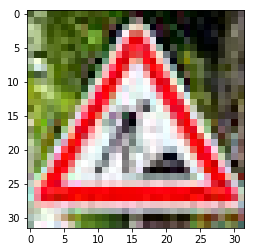

(32, 32, 3)


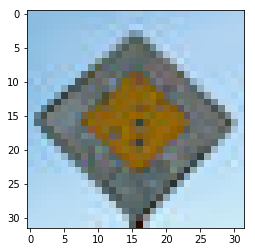

(32, 32, 3)


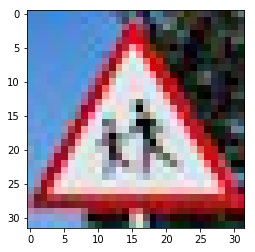

(32, 32, 3)


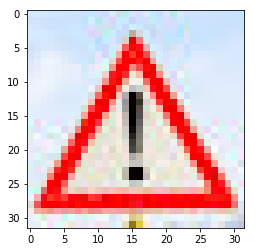

(32, 32, 3)


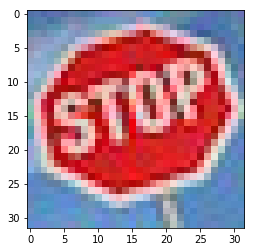

(32, 32, 3)


In [27]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.



new_images = []

new_img_path = "./new-images/"
files = os.listdir(new_img_path)
for file in files:
    if ".jpg" in file:
        image = mpimg.imread(new_img_path + file)
        new_images.append(image)
        plt.imshow(image)
        plt.show()
        
        #print(image)
        print(np.array(new_images[0]).shape)



### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

The first sign didn't get correct result. I think one of the reason is that there are some background colors. Another reason maybe because of the image was scaled and crop with a different scale as the training data.

For the first reason, we may need do some preprocess of the data, detect the border of the sign, remove the useless pixels.
For the second reason, we may need find more training material, or scale the training data to generate those training materials to get more accurate results.

In [28]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

classi = []

with tf.Session() as sess:
    sess.run(tf.initialize_all_variables()) #It will show error without this line
    loader = tf.train.import_meta_graph('lenet.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))

    classi = sess.run(prediction, feed_dict={x: new_images} )
        
    print("classification ", classi)
    
signnames = {}
with open('./signnames.csv') as snf:
    for line in snf:
        columns = line.split(",")
        signnames[columns[0]] = columns[1]
        
#print(signnames)

for c in classi:
    c_str = str(c)
    signname = signnames[c_str]
    #print("class id = ", c, " class name = ", signname)

Instructions for updating:
Use `tf.global_variables_initializer` instead.
INFO:tensorflow:Restoring parameters from ./lenet
classification  [25 12 28 18 14]


In [29]:
#print sign in the train set

def print_train_image_from_classification(clsid):
    train_idx = -1
    for idx in range(len(y_train__full)):
        if y_train_full[idx] == clsid:
            train_idx = idx
            
    if train_idx > -1:
        X_train_i = X_train_full[train_idx]
        
        plt.imshow(X_train_i)
        plt.show()
        
#for c in classi:
#    print_train_image_from_classification(c)


In [30]:
# TODO: Visualize the distribution by probability

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

The accuracy of the result is 98%+ in test set. But it not perform as well as test set.  

The new captured image may have some rotation and color changes. Also the capture of the image has some different background. 

The color adaption and background removal may needed in the future coding.



### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In [31]:
### Run the predictions here.
### Feel free to use as many code cells as needed.


predict_indexes = [0,3000,6000,9000,12000]


with tf.Session() as sess:
    sess.run(tf.initialize_all_variables()) #It will show error without this line
    loader = tf.train.import_meta_graph('lenet.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))

    for idx in predict_indexes:
        predict_img = X_train_full[idx]
        train_y = y_train_full[idx]
        
        softmaxes = sess.run(tf.nn.top_k(sm, k=3), feed_dict={x: [predict_img]} )
        
        print(idx)
        print(softmaxes)
        
        #print("classification of index ", idx, "  = " , classi, " real value = ", train_y)

Instructions for updating:
Use `tf.global_variables_initializer` instead.
INFO:tensorflow:Restoring parameters from ./lenet
0
TopKV2(values=array([[  9.99107063e-01,   8.41981382e-04,   3.57240424e-05]], dtype=float32), indices=array([[0, 1, 4]], dtype=int32))
3000
TopKV2(values=array([[  9.98517573e-01,   6.33657561e-04,   6.24898297e-04]], dtype=float32), indices=array([[ 2,  9, 15]], dtype=int32))
6000
TopKV2(values=array([[ 0.4946304 ,  0.39507949,  0.09246021]], dtype=float32), indices=array([[3, 2, 5]], dtype=int32))
9000
TopKV2(values=array([[ 0.81416303,  0.08581453,  0.05333098]], dtype=float32), indices=array([[2, 1, 3]], dtype=int32))
12000
TopKV2(values=array([[  9.95268643e-01,   3.98909906e-03,   7.02643360e-04]], dtype=float32), indices=array([[8, 7, 2]], dtype=int32))


In [38]:
X_train_full[predict_indexes]

array([[[[ 75,  78,  80],
         [ 74,  76,  78],
         [ 83,  84,  83],
         ..., 
         [ 67,  74,  73],
         [ 65,  69,  68],
         [ 66,  67,  66]],

        [[ 82,  83,  85],
         [ 80,  80,  82],
         [ 87,  86,  83],
         ..., 
         [ 73,  77,  77],
         [ 75,  77,  75],
         [ 79,  79,  77]],

        [[ 79,  79,  81],
         [ 84,  83,  85],
         [ 91,  88,  89],
         ..., 
         [ 72,  74,  72],
         [ 74,  75,  71],
         [ 78,  78,  74]],

        ..., 
        [[126, 128, 133],
         [118, 123, 128],
         [108, 117, 120],
         ..., 
         [ 96,  96,  90],
         [ 99, 101,  94],
         [ 99, 103,  99]],

        [[ 90,  94,  98],
         [ 91,  97, 103],
         [ 77,  87,  92],
         ..., 
         [104, 104,  97],
         [107, 111, 102],
         [ 95, 103,  97]],

        [[ 85,  84,  87],
         [ 93,  99, 104],
         [ 69,  80,  85],
         ..., 
         [101, 102,  94],
  

For most of the results, the probabilities are quite high. Except for #9000, the rate is 0.79. The result choose that highest probabilite one as the result.

Step 4 (Optional): Visualize the Neural Network's State with Test Images
This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the LeNet lab's feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper End-to-End Deep Learning for Self-Driving Cars in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

In [32]:

### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

INFO:tensorflow:Restoring parameters from ./lenet


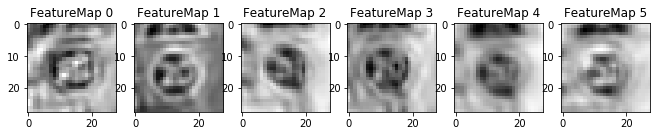

In [39]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    conv1 = sess.graph.get_tensor_by_name('Conv2D:0')
    outputFeatureMap(X_train_full[predict_indexes], conv1)

INFO:tensorflow:Restoring parameters from ./lenet


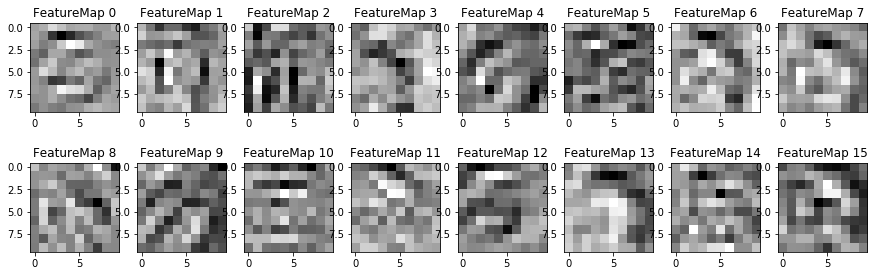

In [40]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    conv1 = sess.graph.get_tensor_by_name('Conv2D_1:0')
    outputFeatureMap(X_train_full[predict_indexes], conv1)

In [35]:
op = sess.graph.get_operations()
[m.values() for m in op]

[(<tf.Tensor 'Placeholder:0' shape=(?, 32, 32, 3) dtype=float32>,),
 (<tf.Tensor 'Placeholder_1:0' shape=<unknown> dtype=int32>,),
 (<tf.Tensor 'one_hot/on_value:0' shape=() dtype=float32>,),
 (<tf.Tensor 'one_hot/off_value:0' shape=() dtype=float32>,),
 (<tf.Tensor 'one_hot/depth:0' shape=() dtype=int32>,),
 (<tf.Tensor 'one_hot:0' shape=<unknown> dtype=float32>,),
 (<tf.Tensor 'truncated_normal/shape:0' shape=(4,) dtype=int32>,),
 (<tf.Tensor 'truncated_normal/mean:0' shape=() dtype=float32>,),
 (<tf.Tensor 'truncated_normal/stddev:0' shape=() dtype=float32>,),
 (<tf.Tensor 'truncated_normal/TruncatedNormal:0' shape=(5, 5, 3, 6) dtype=float32>,),
 (<tf.Tensor 'truncated_normal/mul:0' shape=(5, 5, 3, 6) dtype=float32>,),
 (<tf.Tensor 'truncated_normal:0' shape=(5, 5, 3, 6) dtype=float32>,),
 (<tf.Tensor 'Variable:0' shape=(5, 5, 3, 6) dtype=float32_ref>,),
 (<tf.Tensor 'Variable/Assign:0' shape=(5, 5, 3, 6) dtype=float32_ref>,),
 (<tf.Tensor 'Variable/read:0' shape=(5, 5, 3, 6) dtype=

In [ ]:
# TODO: Transfer Learning